$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\dd}{\,\mathrm{d}}
$$

# Stokes 1<sup>st</sup> Problem "Accelerated Plate"


An infinite long plate lies along $y=0$ and is surrounded by a quiescent fluid with constant density $\rho$ and viscosity $\mu$. At time $t=0$ the plate is impulsively accelerated to the velocity $U$. The pressure at $x=\pm\infty$ is maintained constant.
What is the velocity in the liquid as a function of $y$ and $t$?

<div class="Figure">
<img src="pics/stokes1sproblem.png" width=350px>
Figure 1: Plate moves with constant velocity $U$ from time $t\ge0$.
</div>

1. The flow is invariant under translation in $x$-direction. Thus it can't depend on $x$ and therefore all derivatives $\pad{}{x}=0$. 
2. Because $\pad{u}{x}+\pad{v}{y}=0$ and the first term $0$ the second term $\pad{v}{y}=0$. As the velocity $v(y=0)=0$ it is $v=0$ everywhere.


Now we have a look at the Navier Stokes equations. We obtain

\begin{eqnarray}
\rho \pad{u}{t} &=& -\pad{p}{x} + \mu \ppad{u}{y}\tag{1}\\
0 &=& -\pad{p}{y}\tag{2}
\end{eqnarray}

Equation (2) immediately gives $p=p(x)$ and as $p\ne p(x)$ the pressure must be constant in the domain.

Thus Eq. (1) becomes 

$$
\pad{u}{t}=\nu\ppad{u}{y}\tag{3}\quad ,
$$

with the boundary conditions 

\begin{eqnarray}
u(y,t<0) &=& 0\tag{4a}\\
u(y=0,t\ge 0) &=& U\tag{4b}\\
u(y\rightarrow\infty , t)&=&0\tag{4c}
\end{eqnarray}

We can form a non-dimensional velocity, $u'=u/U$. We assume that this nondimensional velocity depends on a nondimensional distance from the wall, say $u'=u'(\eta)$, where $\eta$ is a nondimensional variable. Because we have no direct lengthscale in the problem, the only length we can form is by the expression $\sqrt{\nu t}$. 

$$\frac{u}{U}=F\left(\frac{y}{\sqrt{\nu t}}\right)\equiv F(\eta)$$

This choice of non-dimensional variable reduces the solution space from 2 $(y,t)$ to 1, namely $\eta=y/\sqrt{\nu t}$ and we can therefore rewrite the PDE into an ODE. $\eta$ is called the similarity variable. Now Eq. (3) is rewritten in $\eta$. For this we need to write the derivatives with respect to $\eta$.

$$
\pad{u}{t}=U\fud{F}{t}=U\fud{F}{\eta}\pad{\eta}{t}=
-\frac{U y}{2\sqrt{\eta t^3}}\fud{F}{\eta}=-\frac{U \eta}{2 t}\fud{F}{\eta}
$$

and

$$
U \ppad{F}{y}=U\pad{}{y}\left(\fud{F}{\eta}\pad{eta}{y}\right)=
U\pad{}{y}\left( \frac{1}{\sqrt{\eta t}}\right)=\\
\frac{U}{\sqrt{\nu t}}\pad{\eta}{y}\fud{}{\eta}\left(\fud{F}{\eta}\right)=
\frac{U}{\nu t}\fud{}{\eta}\left(\fud{F}{\eta}\right)$$

We can now insert both above expression into Eq. (3) and obtain

$$\frac{\eta}{2}\fud{F}{\eta}=-\fud{}{\eta}\left(\fud{F}{\eta}\right)\quad , \tag{5}
$$

with the boundary conditions: $F(\eta=0) = 1$ and $F(\eta\rightarrow\infty)=0$.

We can find the solution by variable substitution and integration, another possibilty is to ask <a href="https://www.wolframalpha.com/input/?i=x%2F2*df(x)%2Fdx%2Bd%5E2f(x)%2Fdx%5E2%3D0"> Wolfram Alpha</a> which gives as a result

$$F(\eta)=\sqrt{\pi} C_1 \,\mathrm{erf}\left(\frac{\eta}{2}\right)+C_2\tag{6}$$

where the symbol $\mathrm{erf}$ stands for the [Error function](https://en.wikipedia.org/wiki/Error_function)

$$\mathrm{erf}(\eta)=\frac{2}{\sqrt{\pi}}\int_0^\eta e^{-t^2} \dd t\quad.$$

Because of $F(\eta=0) = 1$ the constant $C_2$ in Eq. (6) is $C_2=1$.
The $\mathrm{erf}(\eta/2)$ goes for $\eta\rightarrow\infty$ to 1, thus for $F(\eta\rightarrow\infty)=0$ the constant $C_1=-\frac{1}{\sqrt{\pi}}$

Thus the solution for the velocity field is

$$\frac{u}{U}=F(\eta)=1-\mathrm{erf}\left(\frac{\eta}{2}\right)=
1-\mathrm{erf}\left( \frac{y}{2\sqrt{\nu t}}\right)\tag{7}\quad .$$




## Example

Below is an example of the velocity field using the viscosity $\mu=0.1\,$Pa s, a density of $\rho=1000\,$kgm$^3$ and a wall velocity of $U=1\,$m/s. You can change the time stated in seconds to see how the flow field penetrates into the region $y>0$.

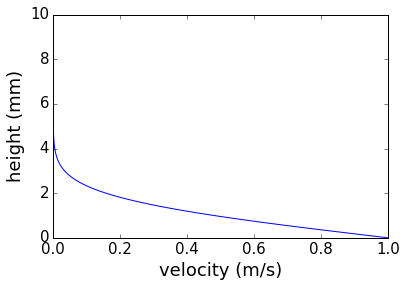

In [43]:
%matplotlib inline 
from scipy.special import erf 
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as widgets


def plotstokes1(t):
    mu=1e-1
    rho=1e3
    U=1.
    y=np.linspace(0,1e-2,100)
    u=U*(1-erf(y/(2.*(mu/rho*t)**.5)))
    plt.plot(u,y*1e3)
    plt.xlabel(r'velocity (m/s)',size=18);plt.ylabel(r'height (mm)',size=18);
    plt.tick_params(labelsize=15)

interact(plotstokes1, t=widgets.FloatSlider(min=0.01,max=0.2,step=.01,value=0.01,\
                                            description='t (s)'));

### Comparison with the Navier-Stokes solver

We need to put in the correct boundary conditions, which are 

$p(x=0)=p(x=L)=\mathrm{const.}$, $u(y=0)=U_{wall}$, and $\nabla u(y=L)= \vb{0}$.

Dependinging on the quality of the mesh we obtain good to very good agreement between the analytical solution Eq. (7) and the numerical solution.
<p>

<div class="Detail">
**Your Work:**
<ol>
<li>Change the viscosity of the liquid in the program below and see how it affects the solution. If you obtain errors or instabilities, you may want to reduce the timestep ``dt`` by decreasing the CFL number. Try viscosities from $1000\,$cSt to $1\,$cSt.</li>

<li>Change the time of the solution from $t=0.01\,$s to $t=0.3\,$s. Find out why the analytical and numerical solutions differ for large time and try to fix this. </li>

</div>


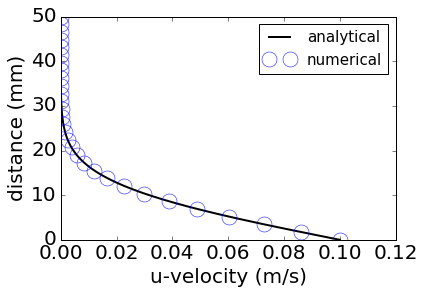

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf 

def presPoisson(p, dx, dy, rho, nu, u, v):
    b[1:-1,1:-1]=rho*(1/dt*((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx)+(v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))-\
                 ((u[1:-1,2:]-u[1:-1,0:-2])/(2*dx))**2-\
                 2*((u[2:,1:-1]-u[0:-2,1:-1])/(2*dy)*(v[1:-1,2:]-v[1:-1,0:-2])/(2*dx))-\
                 ((v[2:,1:-1]-v[0:-2,1:-1])/(2*dy))**2)

    for q in range(nit):
        pn = p.copy()
        p[1:-1,1:-1] = ((pn[1:-1,2:]+pn[1:-1,0:-2])*dy**2+(pn[2:,1:-1]+pn[0:-2,1:-1])*dx**2)/\
                        (2*(dx**2+dy**2)) -\
                        dx**2*dy**2/(2*(dx**2+dy**2))*b[1:-1,1:-1]
        #boundary conditions        
        p[-1,:] = p[-2,:] - rho*nu/dy*(-2*v[-2,:]+v[-3,:])
        p[0,:] = p[1,:] - rho*nu/dy*(-2*v[1,:]+v[2,:])
        p[:,0] = 0.001
        p[:,-1] = 0.001

    return p

def NSFlow(nt, u, v, dt, dx, dy, p, rho, nu):
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        p = presPoisson(p, dx, dy, rho, nu, u, v)
        
        u[1:-1,1:-1] = un[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[0:-2,1:-1])-\
                        dt/(2*rho*dx)*(p[1:-1,2:]-p[1:-1,0:-2])+\
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])+\
                        dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1]))

        v[1:-1,1:-1] = vn[1:-1,1:-1]-\
                        un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,0:-2])-\
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-\
                        dt/(2*rho*dy)*(p[2:,1:-1]-p[0:-2,1:-1])+\
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])+\
                        (dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])))
            
        u[0,:] = Uwall
        u[:,0] = u[:,1]
        u[:,-1] = u[:,-2]
        u[-1,:] = 0
        v[0,:] = 0
        v[-1,:]=0
        v[:,0] = 0
        v[:,-1] = 0 
                    
    return u, v, p

xlen= 0.01  #physical length in horizontal direction in [m]
nit = 20  #number of Poisson iterative steps 
nx = 3    #number of grid points in horizontal direction
dx = xlen/(nx-1)

##########
#Variables you can change to see their effect on the solution
##########
ylen= 0.05  #physical length in vertical direction in [m]
ny = 30     #CHANGE number of grid points in vertical direction
Uwall=0.1   #CHANGE velocity of the wall for the lid-case or the inlet velocity of tubev
nu=1e-4     #CHANGE kinematic viscosity [m^2/s]
rho = 1e3   #CHANGE density of the liquid [kg/m^3]
t=0.5      #CHANGE time of solution

dy = ylen/(ny-1)
CFL = 0.05    #CFL number sufficientl small to be stable
dt = CFL * dy / Uwall #time step interval
nt = int(t/dt)  #number of time steps each having length dt 

u = np.zeros((ny, nx)) #velocity field arrays
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) #pressure field arrays
b = np.zeros((ny, nx)) #this is needed for the Poisson solver
u, v, p = NSFlow(nt, u, v, dt, dx, dy, p, rho, nu)

x = np.linspace(0, xlen, nx)
y = np.linspace(0, ylen, ny)
ya = np.linspace(0, ylen, 200)

plt.plot(Uwall*(1-erf(ya/(2.*(nu*t)**.5))),ya*1e3,'k',linewidth=2,label='analytical')
plt.plot(u[:,int(nx/2)],y*1e3,'bo',markersize=15,markeredgecolor='blue',\
         markerfacecolor='none',label='numerical')
plt.xlabel('u-velocity (m/s)',size=20);plt.ylabel('distance (mm)', size=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=15);

In [38]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()